In [88]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Use `load_boston` to load the Boston Housing Dataset.
You must create a Linear Regression model fitted to this data to predict house prices.

- Check the data for nulls
- Explore the data, distributions, correlations.
- Take that into mind when choosing the features for your model.
- Watch out for colinearity.
- Split your data into train and test. [Check out how!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- Measure the goodness of your fit! $R^2$, $RMSE$, etc.
- Try to make it better.
- Do your own research. Checkout both sklearn and statsmodels, get a feel of both.
- Have fun.


In [13]:
boston_dataset = load_boston()

In [14]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
# Description of the dataset to see what does each variable mean
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# We are interested in the feature MEDV, which information is in the target

In [18]:
# Transform the data into a dataframe with pandas
boston_data = pd.DataFrame(boston_dataset["data"], columns=boston_dataset["feature_names"])
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
# The value MEDV is not in the data so we add a new column with this value and the information for the value in target.
boston_data["MEDV"]=boston_dataset["target"]


In [21]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check the data for nulls

In [25]:
boston_data.isnull().sum()
# There are no null data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Explore the data, distributions, correlations

#### Correlations

In [31]:
correlation=boston_data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

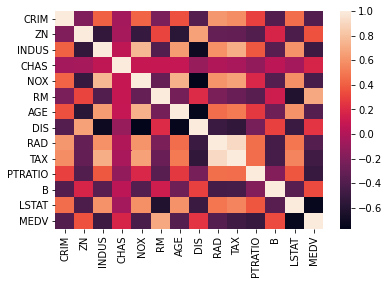

In [32]:
# This is more visually seen in a heatmap
sns.heatmap(correlation)

The variables in the last line that have a dark color are negatively correlated with MEDV, while the variables that have intermediate colors do not have any relation with MEDV and the variables with the lightest colors have a positive correlation with MEDV.

The variables with the highest positive correlation with the variable MEDV are ZN, RM and B, this means that these variables increase or decrease together with MEDV. The highest correlation is with RM.

The variables with a highest negative correlation with the variable MEDV are INDUS, TAX, PTRATIO and LSTAT, this means that these variables increase or decrease inverselly to MEDV. The highest correlation is with LSTAT.

#### Colinearity

We cannot choose variables that have a high correlation between them, because they cannot independently predict the value of the dependent variable (MEDV) for example:
- RAD and TAX (correlation=0.910228)


I will choose the variables RM and LSTAT that have a correlation of -0.613808 between them and a correlation of 0.695360 and -0.737663 with MEDV respectively.

### See how the features selected vary with MEDV

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

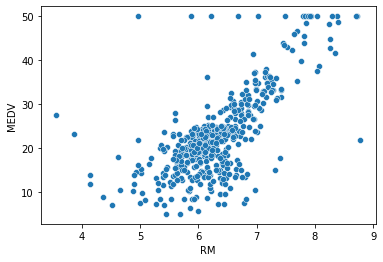

In [87]:
# Plot for RM with MEDV

sns.scatterplot(x=boston_data["RM"], y=boston_data["MEDV"])


The price increases as the average number of rooms per house increases

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

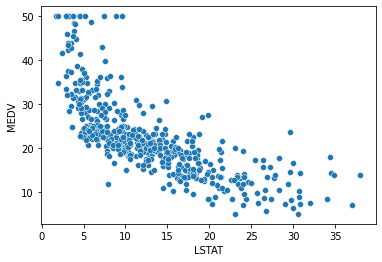

In [34]:
# Plot for LSTAT with MEDV

sns.scatterplot(x=boston_data["LSTAT"], y=boston_data["MEDV"])

The price decreases as the percentaje of lower status of the population increases

Here we can see the positive and negative correlation between the variables and MEDV

### Split the data in train and test

In [36]:
# Concatenate the LSTAT and RM
X = pd.DataFrame(np.c_[boston_data['LSTAT'], boston_data['RM']], columns = ['LSTAT','RM'])
Y = boston_data['MEDV']

In [59]:
# Split the dataset into train and test, we get the 80% of the values for training and the 20% for the test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)


In [60]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [78]:
# predicted Y for the testing
y_test_predict = lm.predict(X_test)
# predicted Y for the training
y_train_predict = lm.predict(X_train)

Text(0, 0.5, 'Predicted prices')

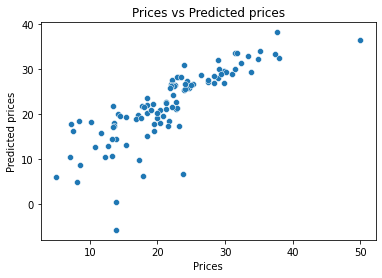

In [89]:
# See the relation between the prices and predicted prices, it follows almost a linear line
sns.scatterplot(x=Y_test, y=y_test_predict)
plt.title("Prices vs Predicted prices")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

### Root Mean Squared Error and R^2

In [85]:
# RMSE and R^2 for the training set
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train = r2_score(Y_train, y_train_predict)

print(f"RMSE for the training set: {rmse_train} ")
print(f"R^2 for the training set: {r2_train} ")

# RMSE and R^2 for testing set
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)

print(f"RMSE for the testing set: {rmse_test} ")
print(f"R^2 for the testing set: {r2_test} ")

RMSE for the training set: 5.684671670534268 
R^2 for the training set: 0.63996285902544 
RMSE for the testing set: 4.895120848739505 
R^2 for the testing set: 0.6148267541505659 


The RMSE of both sets is similar so this is a good value, and the R^2 for the testing set is 0.61 which is an acceptable value, the fit of the model is acceptably good.

## Try with other features

Next, I will choose the INDUS, TAX, PTRATIO and LSTAT which are the ones with a high negative correlation with MEDV

### See how they vary with MEDV

<AxesSubplot:xlabel='INDUS', ylabel='MEDV'>

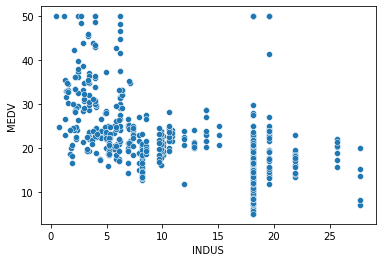

In [65]:
# Plot for INDUS with MEDV

sns.scatterplot(x=boston_data["INDUS"], y=boston_data["MEDV"])

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

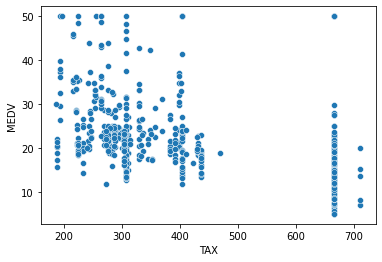

In [66]:
# Plot for TAX with MEDV

sns.scatterplot(x=boston_data["TAX"], y=boston_data["MEDV"])

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

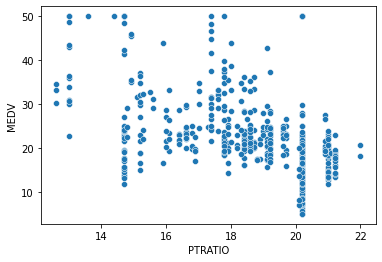

In [67]:
# Plot for PTRATIO with MEDV

sns.scatterplot(x=boston_data["PTRATIO"], y=boston_data["MEDV"])

Any of them has a linear variation so they are not better features than the two previous ones to develop the linear regression.

### Conclusion

The best linear regression to predict the prices is obtained with the features RM and LSTAT

### Further resources

- [The internet is your friend](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c)
- [Scikit-Learn](https://scikit-learn.org)
- [Statsmodels](https://statsmodels.org)